# Lab 3-2: Snow Density and Compaction

For this example, we want to combine the snow depth and snow water equivalent data to investigate changes in snow density with time.


In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# load data file (we will focus on lidar 6, others will be useful for the homework)
ds6 = xr.open_dataset('../data/lidar_l6_pillow_depths.nc')
# Also make the accompanying timeseries info
start_date = dt.datetime(2022, 10, 10)
end_date = dt.datetime(2023, 3, 25)

ds6

<xarray.Dataset>
Dimensions:    (time: 149, stat: 6, pillow: 3)
Coordinates:
  * time       (time) datetime64[ns] 2022-10-14 2022-10-15 ... 2023-03-21
  * stat       (stat) object 'mean' 'stddev' 'median' 'min' 'max' 'count'
  * pillow     (pillow) object 'C' 'UW' 'D'
Data variables:
    snowdepth  (time, stat, pillow) float64 ...

Now load the SWE dataset from Module 2.

In [5]:
sos_dataset_60min=xr.open_dataset("../data/sos_SWE_T_P.nc")
# you may need to check the path here -- 
# if you put the dataset in the same folder as this lab, erase the ../data/ part above 

# Provide a the start and end dates you want to download
start_dateSWE = '20221201'
end_dateSWE = '20230327'

# Provide the specific variables you want to extract from the dataset.
# We provide these in advance because the datasets are very large and, 
# when we open them, we want to immediately extract only the data we want.
VARIABLES = [
    'SWE_p1_c',
    'SWE_p2_c',
    'SWE_p3_c',
    'SWE_p4_c',
    'T_2m_c',
]

# Note, pillow 1 is UW, pillow 2 is c, pillow 3 is UE, and pillow 4 is D.

# Create a list of datetime objects for every day between the provided start_date and end_date. 
datelist = pd.date_range(
    dt.datetime.strptime(start_dateSWE, '%Y%m%d'),
    dt.datetime.strptime(end_dateSWE, '%Y%m%d'),
    freq='d'
).strftime('%Y%m%d').tolist()

For the central snow pillow, make a plot of both depth and SWE.

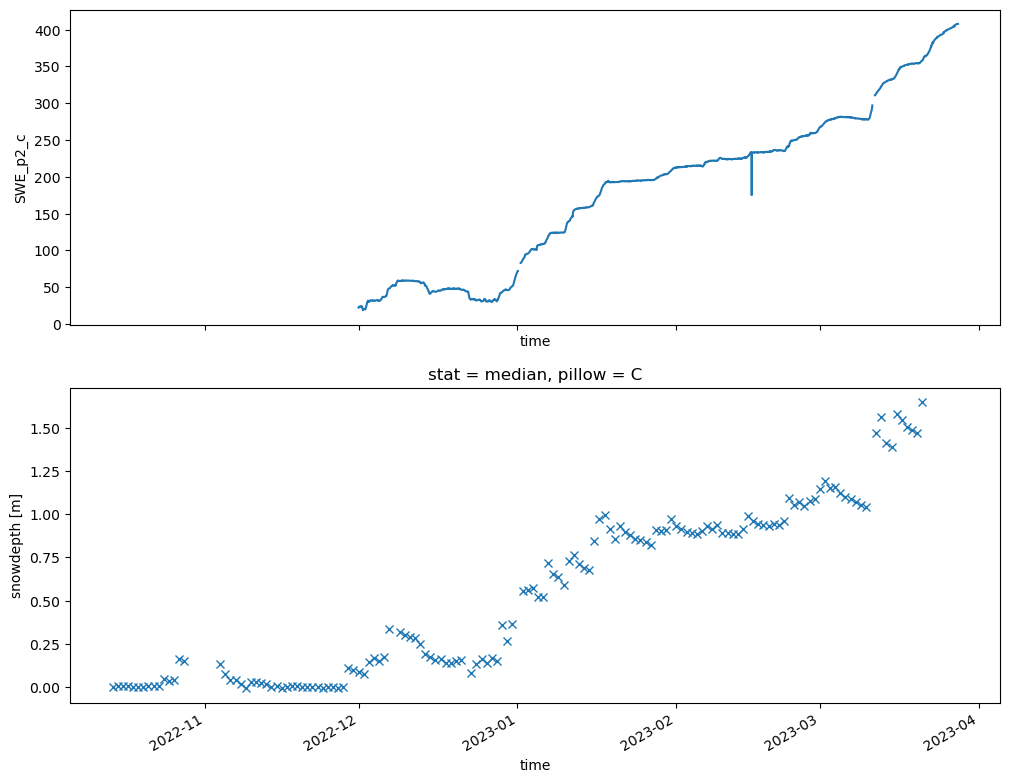

In [6]:
# We'll do this here for the central pillow location; you will want to repeat for the others
s="median"
fig, axes = plt.subplots(2, 1, figsize=(12,9), sharex=True)
sos_dataset_60min['SWE_p2_c'].plot(ax=axes[0], label='SWE_p2_c')
ds6["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c")

Okay, and now Jessica needs help.  Please, get these into the same time stamp, and the same units, and then divide SWE by depth to get density through time.  (I'm also wondering if these are on the same exact time stamp as shown above, looks like maybe slightly off -- what's the averaging interval on each of these?)

In [41]:
sos_dataset_60min_interpolated = sos_dataset_60min.interp_like(ds6)

density_uw = sos_dataset_60min_interpolated['SWE_p1_c'] / ds6.sel(pillow='UW', stat='mean')['snowdepth']
density_c = sos_dataset_60min_interpolated['SWE_p3_c'] / ds6.sel(pillow='C', stat='mean')['snowdepth']
density_d = sos_dataset_60min_interpolated['SWE_p4_c'] / ds6.sel(pillow='D', stat='mean')['snowdepth']

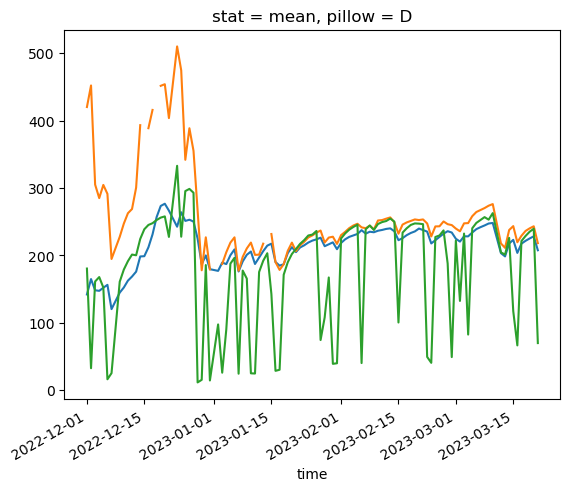

In [45]:
density_uw.plot()
density_c.plot()
density_d.plot()